In [1]:
import pandas as pd
df = pd.read_csv('/Users/vipin-16319/Documents/csv files/train.csv',encoding='ISO-8859-1')

In [2]:
df

,0,Starting back at work today Looks like it'll be raining for the next couple of days
0,1,Sugar levels dropping... munchies setting in. ...
1,1,@karineb22 yeah!!! have a great summer break!
2,1,hannah montana was very good. now going to re...
3,1,"@Mayra326 aww, have fun! I just had my 3D las..."
4,0,Worried about my cat. Took him to the vet and ...
...,...,...
149979,0,Had a great night at Tabs but now I'm missing ...
149980,1,What a night at work.. Church in the morning
149981,0,this book is terrible im used 2 reading all ...
149982,0,@backstreetboys Updates? Any? I miss your upd...


In [3]:
df.columns = ['label','text']

In [4]:
def emoji(tweet):
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [5]:
tweet = df.columns.values[1]
sentiment = df.columns.values[0]
tweet, sentiment


('text', 'label')

In [85]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             
    tweet = re.sub('@[^\s]+', '', tweet)                              
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)  
    tweet = re.sub(r"\d+", " ", str(tweet))                          
    tweet = re.sub('&quot;'," ", tweet)                              
    tweet = emoji(tweet)                                             
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                      
    tweet = re.sub(r'(..)\1+', r'\1', tweet)
    tweet = re.sub(r'\b[a-zA-Z]{2}\b', '', tweet)                      
    tweet = re.sub(r"\s+", " ", str(tweet))                             
    return tweet


In [86]:
!pip install contractions

In [87]:

df

,label,text,processed_tweet
0,1,Sugar levels dropping... munchies setting in. ...,sugar level drop munchi set luckili black choc...
1,1,@karineb22 yeah!!! have a great summer break!,yeah great summer break
2,1,hannah montana was very good. now going to re...,hannah montana wa veri good go read twilight
3,1,"@Mayra326 aww, have fun! I just had my 3D las...",aww fun last week
4,0,Worried about my cat. Took him to the vet and ...,worri cat took vet hi blood work etc wa normal...
...,...,...,...
149979,0,Had a great night at Tabs but now I'm missing ...,great night tab miss chad go bed
149980,1,What a night at work.. Church in the morning,night work church morn
149981,0,this book is terrible im used 2 reading all ...,thi book terribl use read make believ teenag l...
149982,0,@backstreetboys Updates? Any? I miss your upd...,updat ani miss updat guy


In [88]:
import numpy as np
df['processed_tweet'] = np.vectorize(process_tweet)(df[tweet])

In [89]:
import contractions 
df['processed_tweet'] = df['processed_tweet'].apply(lambda x: contractions.fix(x))

In [90]:
tokenized_tweet = df['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [sugar, levels, dropping, munchies, setting, l...
1                   [yeah, have, great, summer, break]
2    [hannah, montana, was, very, good, now, going,...
3              [aww, have, fun, just, had, last, week]
4    [worried, about, cat, took, him, the, vet, and...
Name: processed_tweet, dtype: object

In [91]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [sugar, level, drop, munchi, set, luckili, hav...
1                   [yeah, have, great, summer, break]
2    [hannah, montana, wa, veri, good, now, go, rea...
3              [aww, have, fun, just, had, last, week]
4    [worri, about, cat, took, him, the, vet, and, ...
Name: processed_tweet, dtype: object

In [92]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()


0    [sugar, level, drop, munchi, set, luckili, hav...
1                   [yeah, have, great, summer, break]
2    [hannah, montana, wa, veri, good, now, go, rea...
3              [aww, have, fun, just, had, last, week]
4    [worri, about, cat, took, him, the, vet, and, ...
Name: processed_tweet, dtype: object

In [93]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words, nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vipin-16319/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


({'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'myself',
  'needn',
  "needn't",
  'no',
  'nor',
  'not',
  'now',
  'o',
  'of',
  'off',
 

In [94]:
for i in range(len(tokenized_tweet)):
    #tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 
    tokenized_tweet[i] = ' '.join([word for word in tokenized_tweet[i] if word not in stop_words])  
    

df['processed_tweet'] = tokenized_tweet
df.head()


,label,text,processed_tweet
0,1,Sugar levels dropping... munchies setting in. ...,sugar level drop munchi set luckili black choc...
1,1,@karineb22 yeah!!! have a great summer break!,yeah great summer break
2,1,hannah montana was very good. now going to re...,hannah montana wa veri good go read twilight
3,1,"@Mayra326 aww, have fun! I just had my 3D las...",aww fun last week
4,0,Worried about my cat. Took him to the vet and ...,worri cat took vet hi blood work etc wa normal...


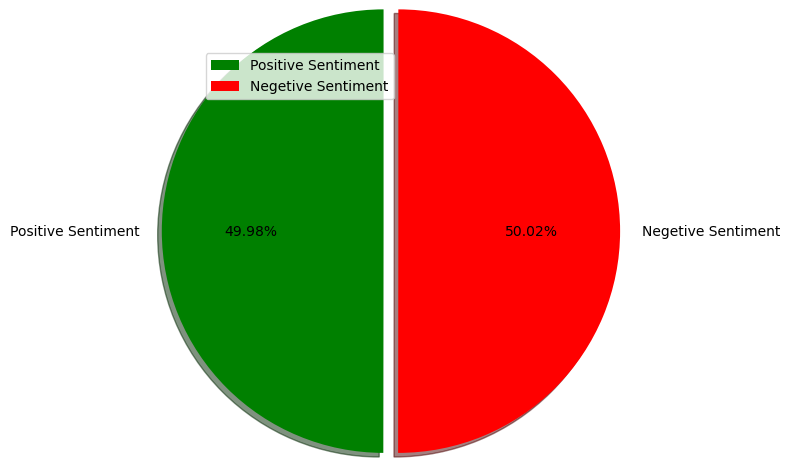

In [95]:
import matplotlib.pyplot as plt
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(df[sentiment] != 0).sum(), (df[sentiment] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

<Figure size 3840x2880 with 0 Axes>

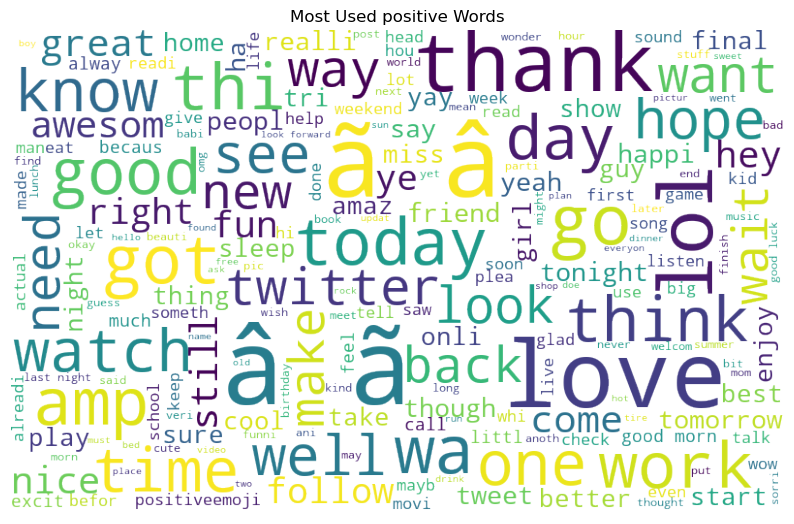

In [96]:
#most used positive words
from wordcloud import WordCloud
positive_words =' '.join([text for text in df['processed_tweet'][df[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used positive Words")
plt.show()


<Figure size 3840x2880 with 0 Axes>

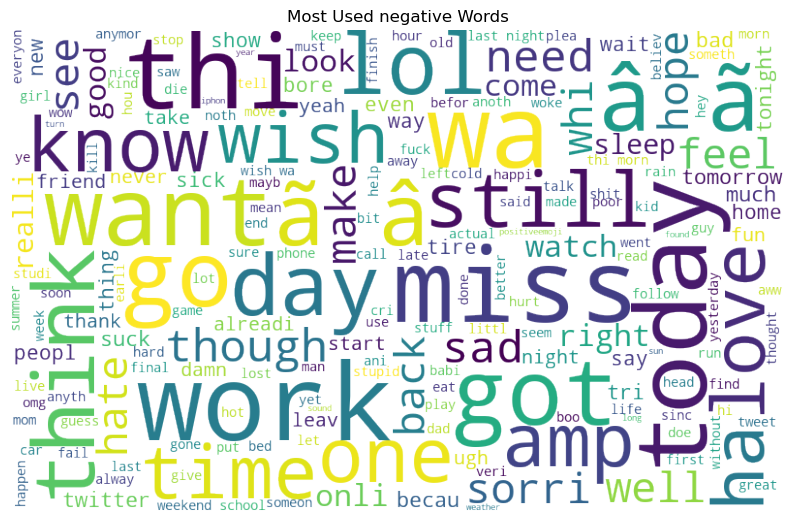

In [97]:
#most used negative words
from wordcloud import WordCloud
negative_words =' '.join([text for text in df['processed_tweet'][df[sentiment] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used negative Words")
plt.show()

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

count_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=100000,max_df=0.01)    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['processed_tweet'])  
final_vectorized_data

transformer = TfidfTransformer()
final_vectorized_data=transformer.fit_transform(final_vectorized_data)
final_vectorized_data

<149984x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 1046784 stored elements in Compressed Sparse Row format>

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df[sentiment],
                                                    test_size=0.2, random_state=69)  

In [100]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

y_train

X_train_shape :  (119987, 100000)
X_test_shape :  (29997, 100000)
y_train_shape :  (119987,)
y_test_shape :  (29997,)


89250     0
121975    0
94859     0
7866      1
118137    0
         ..
37142     1
142897    1
25015     0
140890    1
122059    0
Name: label, Length: 119987, dtype: int64

In [101]:
from sklearn.naive_bayes import MultinomialNB  
# Naive Bayes Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
param_grid = {
    'clf__alpha': [0.001,0.01,0.1,1,1.3,1.4,1.7,2,2.4,2.5,10],
    'clf__fit_prior': [True, False],
    'clf__class_prior': [None, [0.5, 0.5]]
}

# Create a pipeline with the MultinomialNB classifier
pipe = Pipeline([('clf', MultinomialNB())])

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


# Get the best estimator
best_estimator = grid_search.best_estimator_

# Fit the best estimator to the data
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)




{'clf__alpha': 10, 'clf__class_prior': None, 'clf__fit_prior': True}


In [102]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
# f1_score = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print('Accuracy:', accuracy)
# print('f1 score:', f1_score)
print('recall', recall)
print('precision:', precision)


Accuracy: 0.73997399739974
recall 0.7445896147403686
precision: 0.7359115290378121


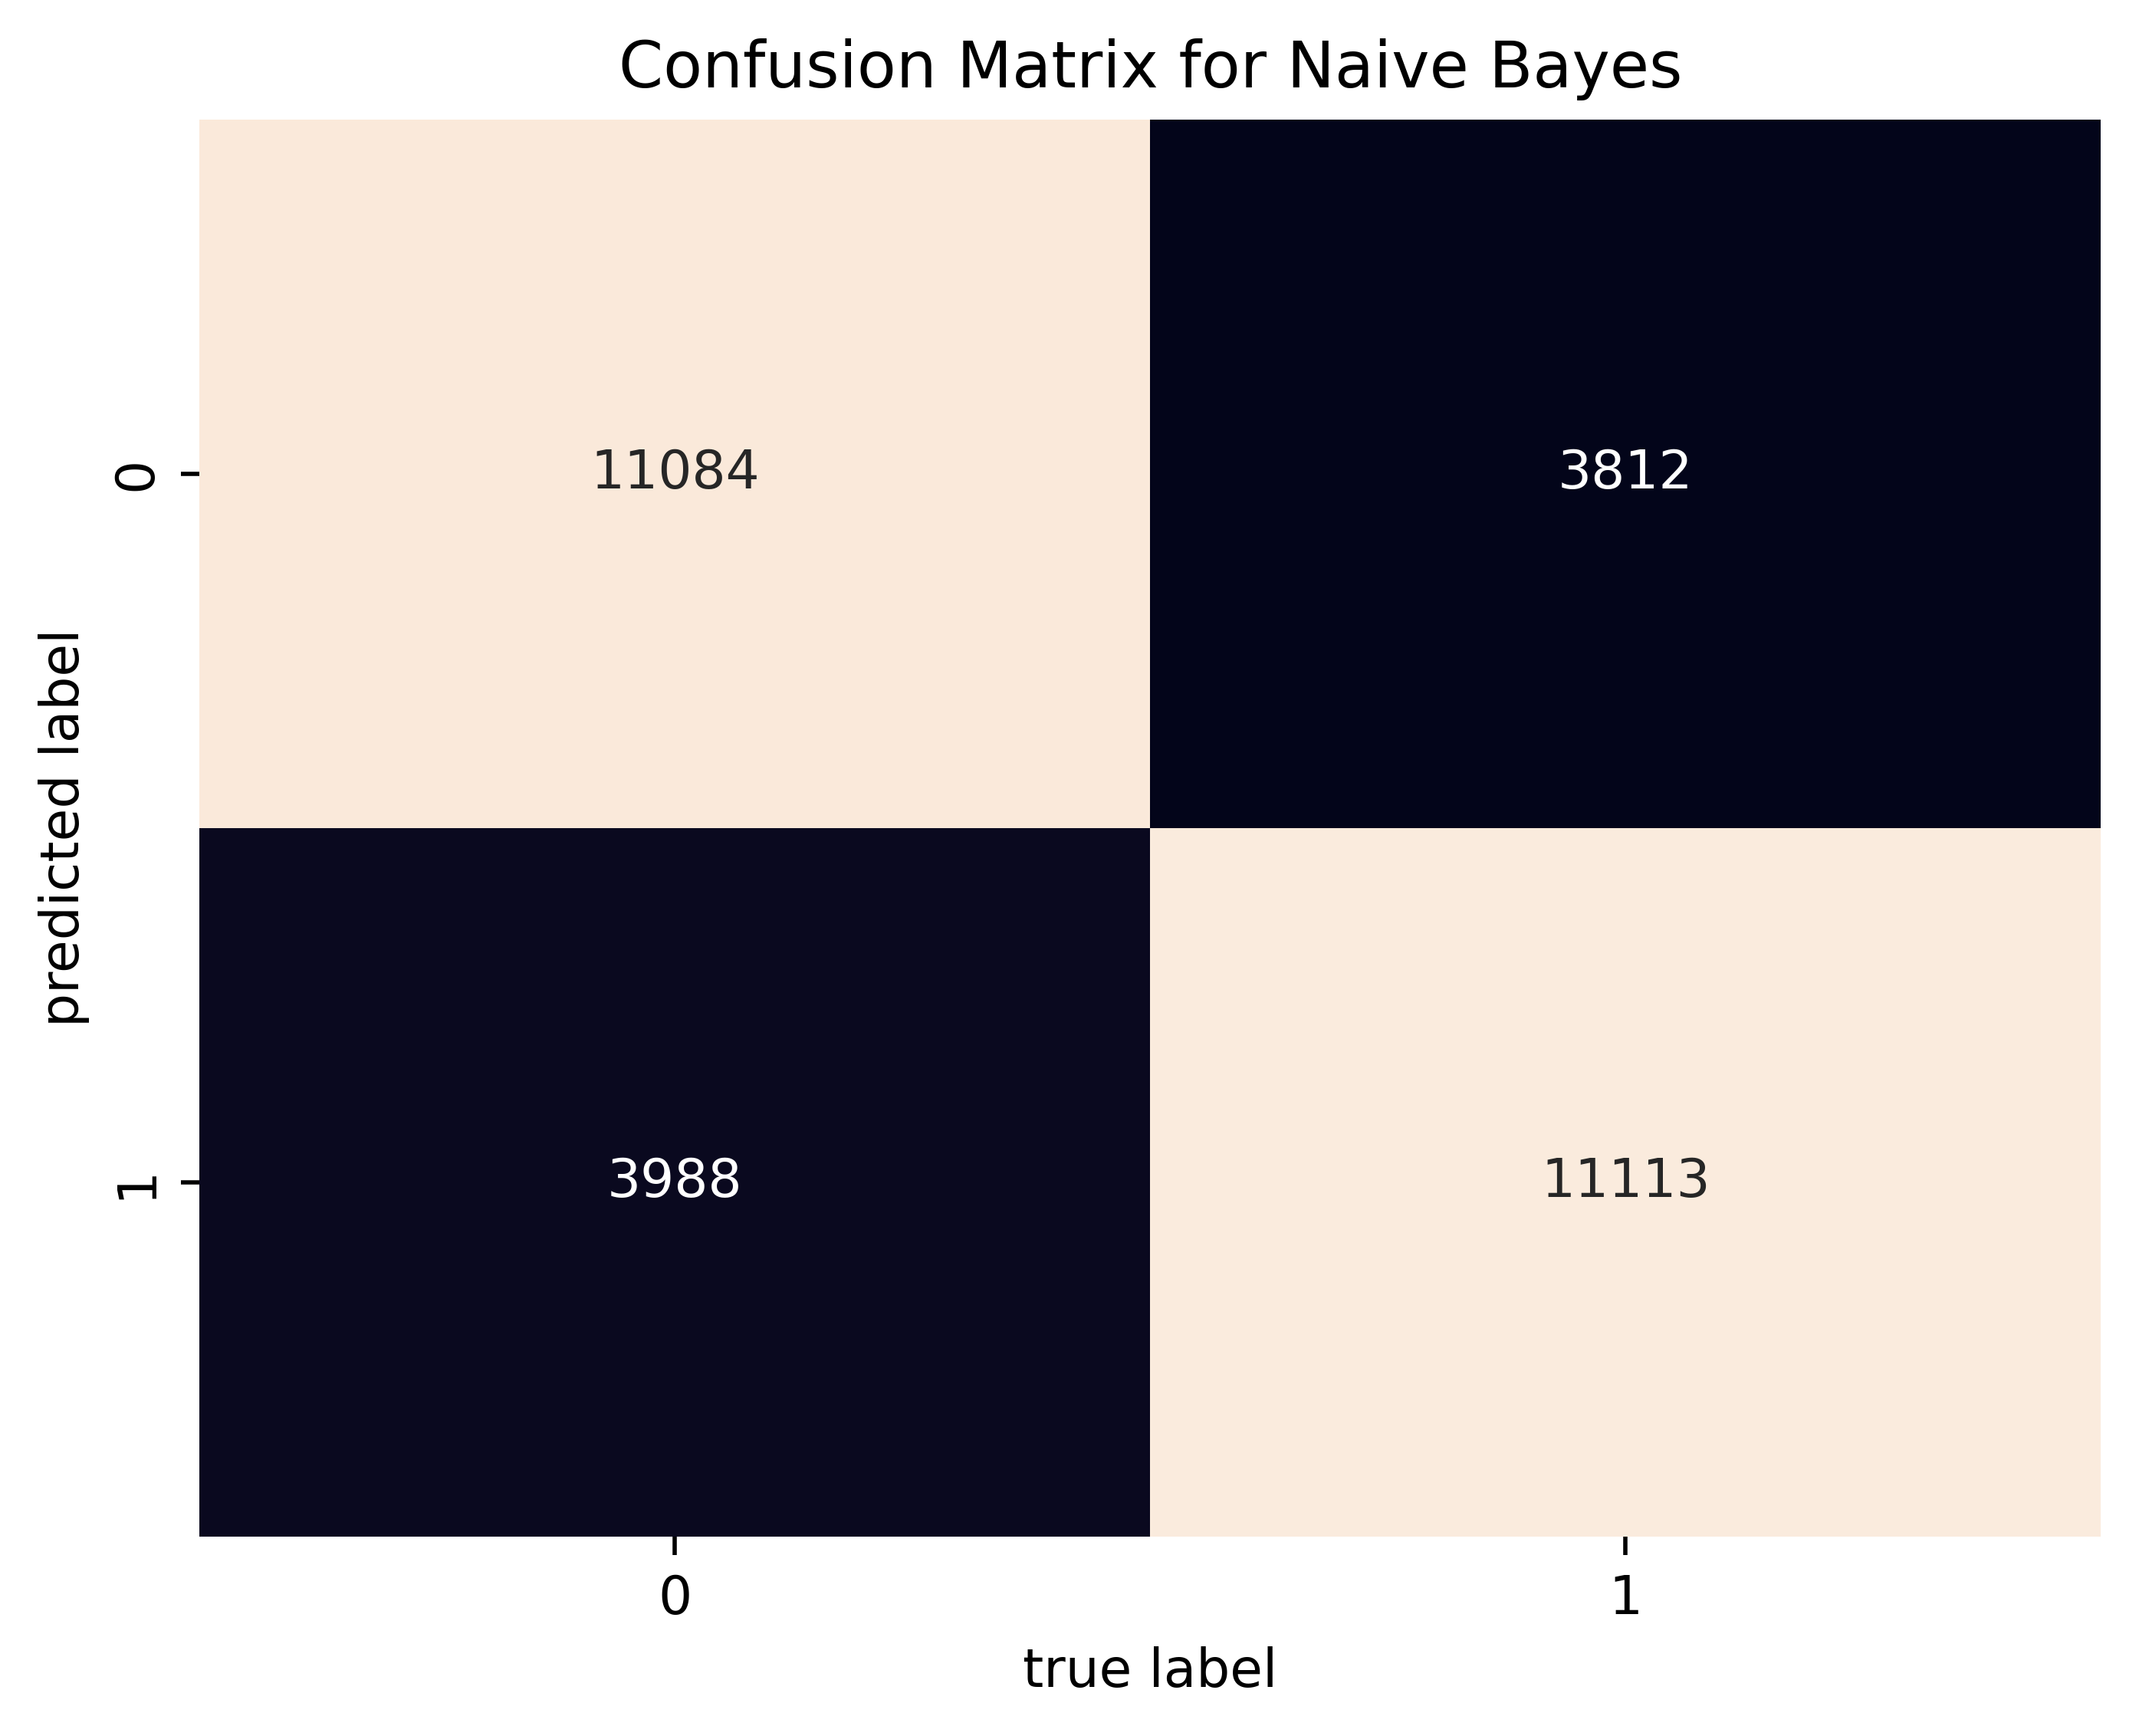

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(dpi=500)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

In [105]:


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#end of multinomial nb

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     15072
           1       0.74      0.74      0.74     14925

    accuracy                           0.74     29997
   macro avg       0.74      0.74      0.74     29997
weighted avg       0.74      0.74      0.74     29997



In [106]:
#start of gaussian nb
X_train_toarray = X_train.toarray()
X_test_toarray = X_test.toarray


In [107]:
X_train_toarray.shape

(119987, 100000)

In [108]:
# from sklearn.naive_bayes import MultinomialNB,GaussianNB  
# # Naive Bayes Classifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# param_grid = {
#     'clf__var_smoothing': [0.001,0.01,0.1,1,1.3,1.5,1.8,2,2.3,2.6],
# }

# # Create a pipeline with the MultinomialNB classifier
# pipe = Pipeline([('clf', GaussianNB())])

# # Create a GridSearchCV object
# grid_search_gb = GridSearchCV(pipe, param_grid=param_grid, cv=10)

# # Fit the GridSearchCV object to the data
# grid_search_gb.fit(X_train_toarray, y_train)
# print(grid_search_gb.best_params_)


# # Get the best estimator
# best_estimator_gb = grid_search_gb.best_estimator_

# # Fit the best estimator to the data
# best_estimator_gb.fit(X_train_toarray, y_train)
# y_pred = best_estimator_gb.predict(X_test_toarray)



In [109]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy = accuracy_score(y_test, y_pred)
# # f1_score = f1_score(y_test,y_pred)
# recall = recall_score(y_test,y_pred)
# precision = precision_score(y_test,y_pred)

# print('Accuracy:', accuracy)
# # print('f1 score:', f1_score)
# print('recall', recall)
# print('precision:', precision)


In [110]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# plt.figure(dpi=500)
# mat = confusion_matrix(y_test, y_pred)
# sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# plt.title('Confusion Matrix for Naive Bayes')
# plt.xlabel('true label')
# plt.ylabel('predicted label')

# plt.show()

In [111]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

# #end of gaussian nb

In [112]:
# #stacking combining the gaussian , multinomial and decsion tree with the hyperparamter
# from sklearn.ensemble import StackingClassifier
# from sklearn.tree import DecisionTreeClassifier

# gnb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

# mnb_param_grid = {
#     'alpha': [0.1,0.5,1.0,1.5,2.0,2.5,3.0],
#     'fit_prior': [True, False],
#     'class_prior': [None, [0.5, 0.5]]
# }

# final_estimator_param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6]}


# gnb = GaussianNB()
# mnb = MultinomialNB()

# gnb_clf = GridSearchCV(gnb, gnb_param_grid, cv=5)
# mnb_clf = GridSearchCV(mnb, mnb_param_grid, cv=5)
# final_estimator_clf = GridSearchCV(DecisionTreeClassifier(), final_estimator_param_grid, cv=5)

# clf = StackingClassifier(estimators=[('gnb',gnb_clf),('mnb',mnb_clf)],final_estimator=final_estimator_clf)
# clf.fit(X_train_toarray,y_train)


In [113]:
# gnb_clf.fit(X_train_toarray, y_train)
# mnb_clf.fit(X_train, y_train)
# final_estimator_clf.fit(X_train, y_train)

In [114]:
# gnb_best_param = gnb_clf.best_params_
# mnb_best_param = mnb_clf.best_params_
# final_best_param = final_estimator_clf.best_params_

In [115]:
# print(gnb_best_param)
# print()
# print(mnb_best_param)
# print()
# print(final_best_param)

In [116]:
# gnb = GaussianNB(**gnb_best_param)
# mnb = MultinomialNB(**mnb_best_param)
# final_estimator = DecisionTreeClassifier(**final_best_param)

# clf = StackingClassifier(estimators=[('gnb', gnb), ('mnb', mnb)], final_estimator=final_estimator)
# clf.fit(X_train_toarray, y_train)

In [117]:
# y_pred = clf.predict(X_test_toarray)

In [118]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [119]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# plt.figure(dpi=500)
# mat = confusion_matrix(y_test, y_pred)
# sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# plt.title('Confusion Matrix for Naive Bayes')
# plt.xlabel('true label')
# plt.ylabel('predicted label')

# plt.show()

In [120]:
!pip3 install xgboost


In [152]:
# using grid search 
import xgboost as xgb

param_grid = {'max_depth': [3, 5],
              'learning_rate': [0.01, 0.1],
              'n_estimators': [50, 100]}
             
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
# f1_score = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print('Accuracy:', accuracy)
# print('f1 score:', f1_score)
print('recall', recall)
print('precision:', precision)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4971
           1       0.81      0.88      0.85      5029

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Accuracy: 0.8379
recall 0.8804931397892225
precision: 0.8127753303964758


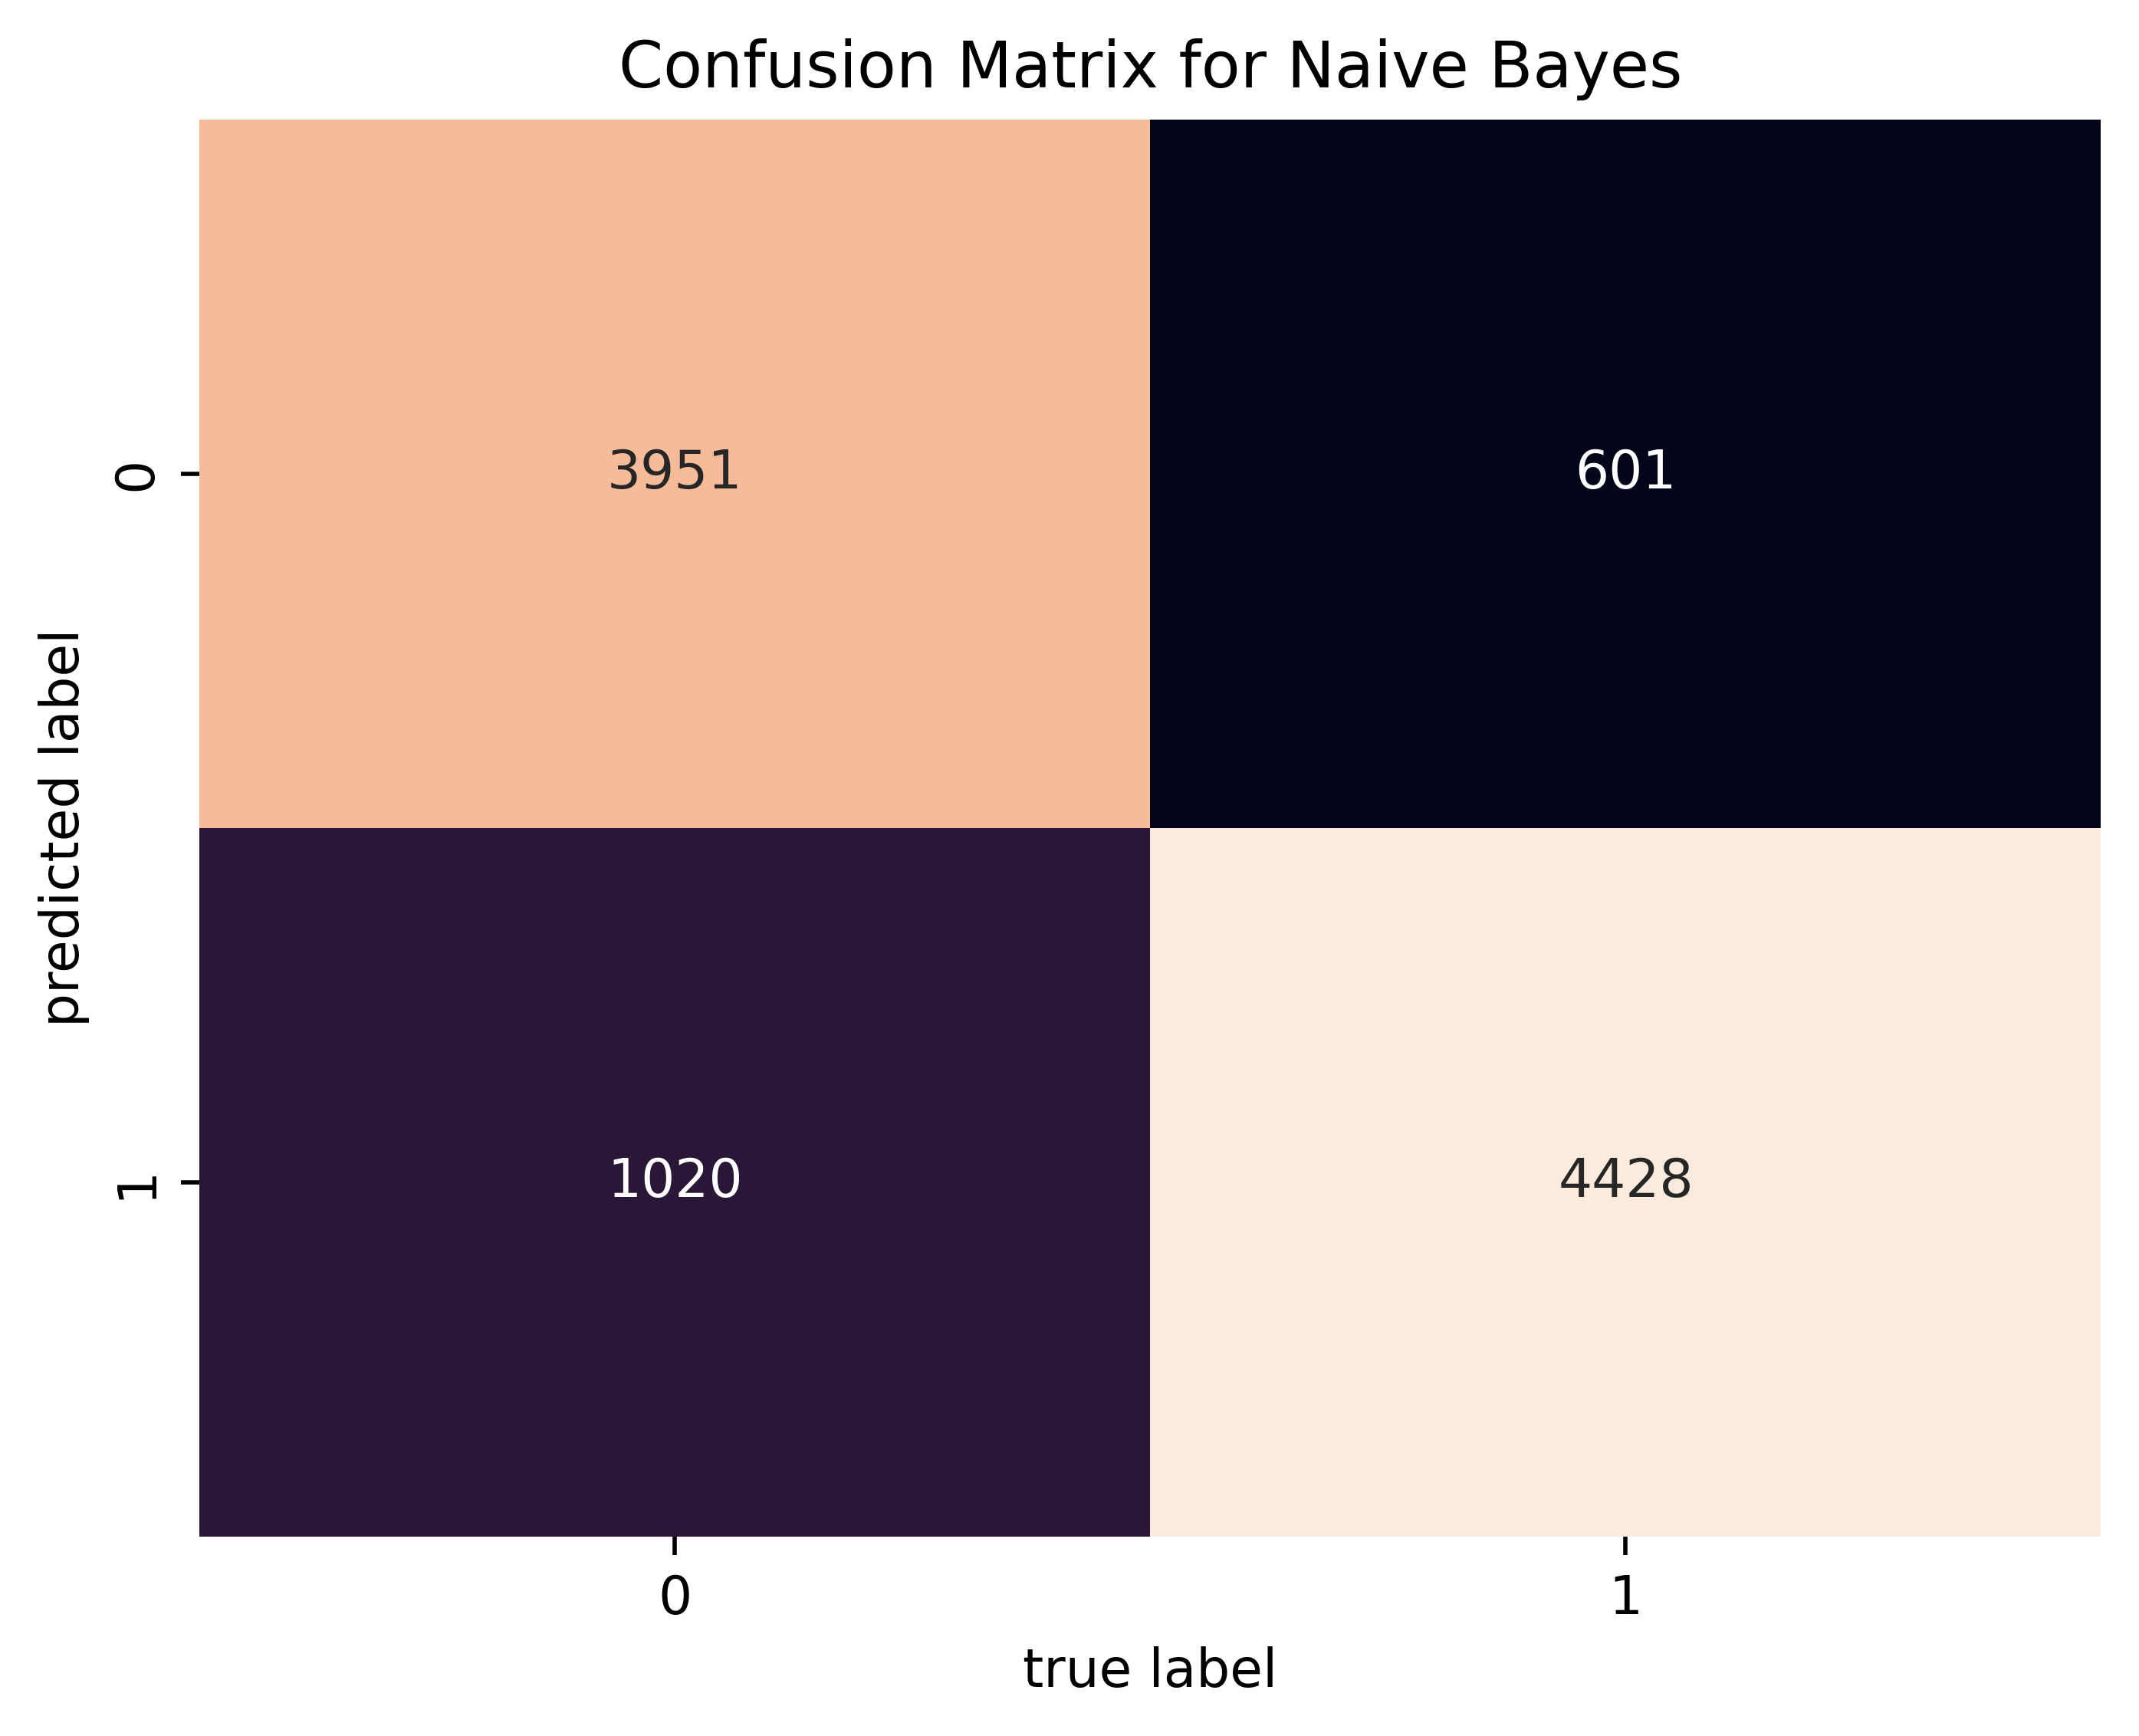

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(dpi=500)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

In [155]:
feature_name = count_vectorizer.get_feature_names()

/Users/vipin-16319/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [156]:
print(feature_name)

['__', '___', '_the', 'aaa', 'aag', 'aaliyah', 'aam', 'aamir', 'aamir khan', 'aardman', 'aaron', 'aaron carter', 'aaron eckhart', 'aaron sorkin', 'ab', 'aback', 'abandon', 'abandon build', 'abandon hi', 'abandon hous', 'abandon mine', 'abba', 'abbey', 'abbi', 'abbi hoffman', 'abbot', 'abbot costello', 'abbott', 'abbott costello', 'abbrevi', 'abc', 'abc famili', 'abc ha', 'abdomen', 'abduct', 'abductor', 'abdul', 'abe', 'abe lincoln', 'abel', 'aberr', 'abet', 'abhay', 'abhay deol', 'abhishek', 'abhor', 'abhorr', 'abid', 'abigail', 'abil', 'abil act', 'abil convey', 'abil creat', 'abil get', 'abil hi', 'abil make', 'abil play', 'abil see', 'abil speak', 'abil tell', 'abil thi', 'abil use', 'abil wa', 'abject', 'abl', 'abl act', 'abl afford', 'abl appreci', 'abl bodi', 'abl bring', 'abl buy', 'abl captur', 'abl carri', 'abl catch', 'abl come', 'abl commun', 'abl control', 'abl convey', 'abl convinc', 'abl creat', 'abl enjoy', 'abl escap', 'abl feel', 'abl find', 'abl follow', 'abl get', '

In [157]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters for each model
# rf_params = {
#     'n_estimators': [100,200,300], 
#     'max_depth': [5,7,9]}
# gb_params = {
#     'n_estimators': [100,200,300], 
#     'learning_rate': [0.001,0.01,0.1,1,1.4,2]}
# dt_params = {
#     'max_depth':[2,4,6,8,10],
#     'min_samples_split':[2,5,10]}

# # Train the base models
# rf = RandomForestClassifier(**rf_params)
# gb = GradientBoostingClassifier(**gb_params)
# dt = DecisionTreeClassifier()
# dt_grid = GridSearchCV(dt, dt_params, cv=5)


# dt_grid.fit(X_train, y_train)
# rf.fit(X_train, y_train)
# gb.fit(X_train, y_train)

# # Get the predictions from the base models
# rf_preds = rf.predict_proba(X_test)[:, 1]
# gb_preds = gb.predict_proba(X_test)[:, 1]
# dt_preds = dt_grid.predict_proba(X_test)[:, 1]

# # Combine the predictions into a single dataframe
# preds = pd.DataFrame({
#     'rf': rf_preds,
#     'gb': gb_preds,
#     'dt': dt_preds
# })

# # Train the XGBoost classifier on the combined predictions
# xgb = XGBClassifier()
# xgb.fit(preds, y_test)

# # Make predictions using the XGBoost classifier
# xgb_preds = xgb.predict(preds)


In [158]:
df2 = pd.read_csv('/Users/vipin-16319/Downloads/IMDB Dataset.csv',encoding='ISO-8859-1')

In [159]:
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [160]:
df2.columns = ['text','label']
df2 = df2.dropna()

In [161]:
df2

,text,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [162]:
df2['label'] = df2['label'].apply(lambda x: 1 if x == 'positive' else 0)


In [163]:
df2

,text,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [164]:
import numpy as np
df2['processed_tweet'] = np.vectorize(process_tweet)(df2['text'])

In [165]:
import contractions 
df2['processed_tweet'] = df2['processed_tweet'].apply(lambda x: contractions.fix(x))

In [166]:
df2

,text,label,processed_tweet
0,One of the other reviewers has mentioned that ...,1,one the other reviewers has mentioned that aft...
1,A wonderful little production. <br /><br />The...,1,wonderful little production the filming techn...
2,I thought this was a wonderful way to spend ti...,1,thought this was wonderful way spend time too...
3,Basically there's a family where a little boy ...,0,basically there family where little boy jake t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love the time money visually stu...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought this movie did down right good job wa...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary schools ...
49998,I'm going to have to disagree with the previou...,0,going have disagree with the previous comment...


In [167]:
tokenized_tweet = df2['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [one, the, other, reviewers, has, mentioned, t...
1    [wonderful, little, production, the, filming, ...
2    [thought, this, was, wonderful, way, spend, ti...
3    [basically, there, family, where, little, boy,...
4    [petter, mattei, love, the, time, money, visua...
Name: processed_tweet, dtype: object

In [168]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [one, the, other, review, ha, mention, that, a...
1    [wonder, littl, product, the, film, techniqu, ...
2    [thought, thi, wa, wonder, way, spend, time, t...
3    [basic, there, famili, where, littl, boy, jake...
4    [petter, mattei, love, the, time, money, visua...
Name: processed_tweet, dtype: object

In [169]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [one, the, other, review, ha, mention, that, a...
1    [wonder, littl, product, the, film, techniqu, ...
2    [thought, thi, wa, wonder, way, spend, time, t...
3    [basic, there, famili, where, littl, boy, jake...
4    [petter, mattei, love, the, time, money, visua...
Name: processed_tweet, dtype: object

In [170]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words, nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vipin-16319/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


({'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'myself',
  'needn',
  "needn't",
  'no',
  'nor',
  'not',
  'now',
  'o',
  'of',
  'off',
 

In [171]:
for i in range(len(tokenized_tweet)):
    #tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 
    tokenized_tweet[i] = ' '.join([word for word in tokenized_tweet[i] if word not in stop_words])  
    

df2['processed_tweet'] = tokenized_tweet
df2.head()

,text,label,processed_tweet
0,One of the other reviewers has mentioned that ...,1,one review ha mention watch episod hook right ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu veri unassu...
2,I thought this was a wonderful way to spend ti...,1,thought thi wa wonder way spend time hot summe...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi hi clo...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


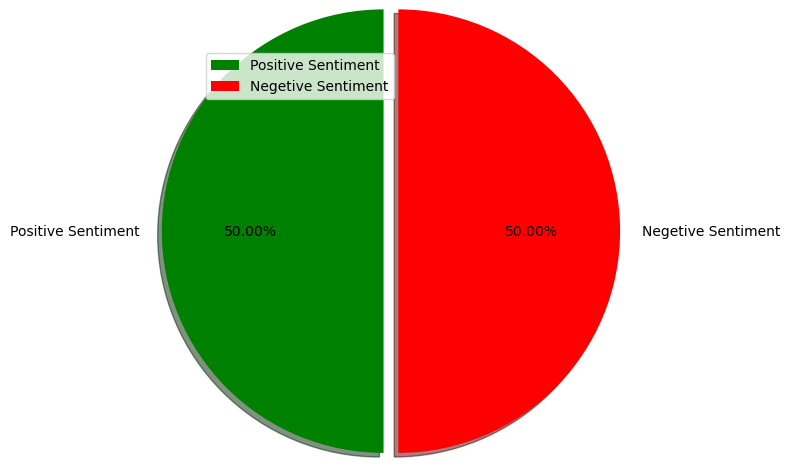

In [172]:
import matplotlib.pyplot as plt
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(df2['label'] != 0).sum(), (df2['label'] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

<Figure size 3840x2880 with 0 Axes>

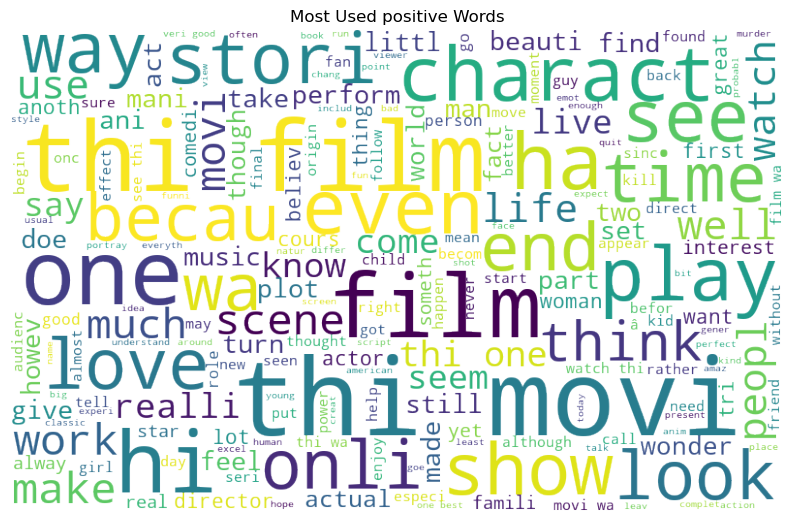

In [173]:
from wordcloud import WordCloud
positive_words =' '.join([text for text in df2['processed_tweet'][df2['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used positive Words")
plt.show()


<Figure size 3840x2880 with 0 Axes>

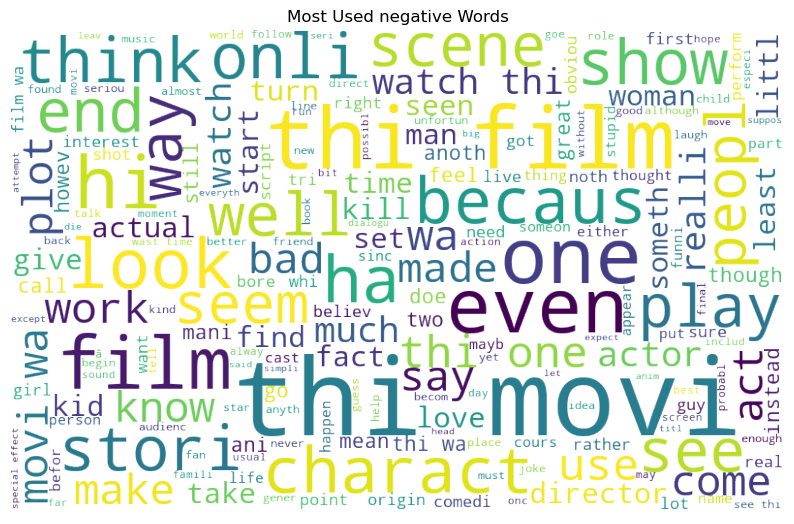

In [174]:
from wordcloud import WordCloud
negative_words =' '.join([text for text in df2['processed_tweet'][df2['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used negative Words")
plt.show()

In [175]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

count_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=100000)    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df2['processed_tweet'])  
final_vectorized_data

transformer = TfidfTransformer()
final_vectorized_data=transformer.fit_transform(final_vectorized_data)
final_vectorized_data

<50000x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 7189642 stored elements in Compressed Sparse Row format>

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df2['label'],
                                                    test_size=0.2, random_state=69)  

In [177]:
y_pred = best_estimator.predict(X_train)

In [179]:
print(classification_report(y_train, y_pred))
accuracy = accuracy_score(y_train, y_pred)
#f1_score = f1_score(y_train,y_pred)
recall = recall_score(y_train,y_pred)
precision = precision_score(y_train,y_pred)

print('Accuracy:', accuracy)
#print('f1 score:', f1_score)
print('recall', recall)
print('precision:', precision)

              precision    recall  f1-score   support

           0       0.48      0.52      0.50     20029
           1       0.48      0.44      0.46     19971

    accuracy                           0.48     40000
   macro avg       0.48      0.48      0.48     40000
weighted avg       0.48      0.48      0.48     40000

Accuracy: 0.479875
recall 0.442341395022783
precision: 0.477461896011242


In [180]:
y_pred = grid_search.predict(X_train)

In [181]:
print(classification_report(y_train, y_pred))
accuracy = accuracy_score(y_train, y_pred)
#f1_score = f1_score(y_train,y_pred)
recall = recall_score(y_train,y_pred)
precision = precision_score(y_train,y_pred)

print('Accuracy:', accuracy)
#print('f1 score:', f1_score)
print('recall', recall)
print('precision:', precision)

              precision    recall  f1-score   support

           0       0.89      0.82      0.86     20029
           1       0.84      0.90      0.87     19971

    accuracy                           0.86     40000
   macro avg       0.87      0.86      0.86     40000
weighted avg       0.87      0.86      0.86     40000

Accuracy: 0.862975
recall 0.9023083471032998
precision: 0.8361948955916473


In [ ]:
feature_name = count_vectorizer.get_feature_names()